In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
datos = pd.read_csv(filepath_or_buffer="/users/Liz/Downloads/samsung.csv")
print("Columnas del DataFrame:", datos.columns.tolist())
print(datos.head())
print(datos.isnull().sum())

Columnas del DataFrame: ['Date', 'Close', 'Volume']
         Date  Close    Volume
0  02/01/2008  10880  18047200
1  03/01/2008  10920  19346500
2  04/01/2008  10780  17997350
3  07/01/2008  10380  39787200
4  08/01/2008  10320  24783700
Date      0
Close     0
Volume    0
dtype: int64


In [11]:
try:
    datos['Date'] = pd.to_datetime(datos['Date'], format='%d/%m/%Y')
except KeyError:
    print("Error: La columna 'Date' no existe. Verifica los nombres de las columnas.")
    # Intento alternativo
    datos['Date'] = pd.to_datetime(datos['Date'], format='%m/%d/%Y', errors='coerce')
datos = datos[['Close', 'Volume']]
datos.dropna(inplace=True)

In [12]:
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(datos)

In [13]:
inertias = []
k_range = range(1, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(datos_scaled)
    inertias.append(kmeans.inertia_)


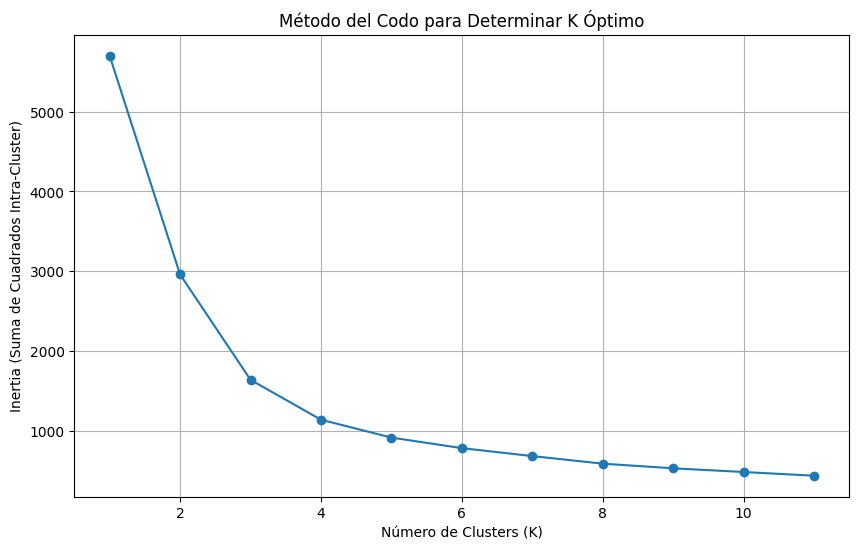

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title('Método del Codo para Determinar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inertia (Suma de Cuadrados Intra-Cluster)')
plt.grid(True)
plt.savefig('elbow_plot_samsung.png')
plt.show()

In [15]:
silhouette_scores = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(datos_scaled)
    score = silhouette_score(datos_scaled, kmeans.labels_)
    silhouette_scores.append(score)

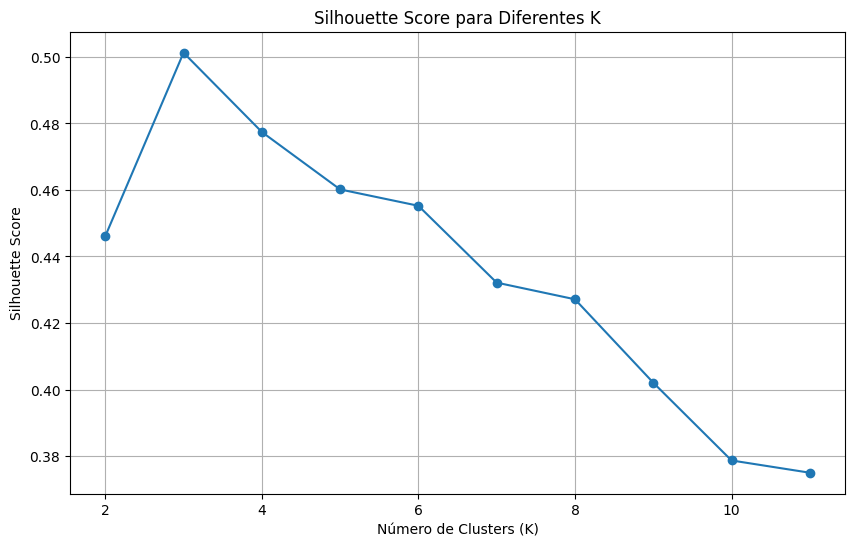

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.title('Silhouette Score para Diferentes K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig('silhouette_plot_samsung.png')
plt.show()


In [17]:
k_optimo = 3  
modelo = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
modelo.fit(datos_scaled)
datos['Cluster'] = modelo.labels_

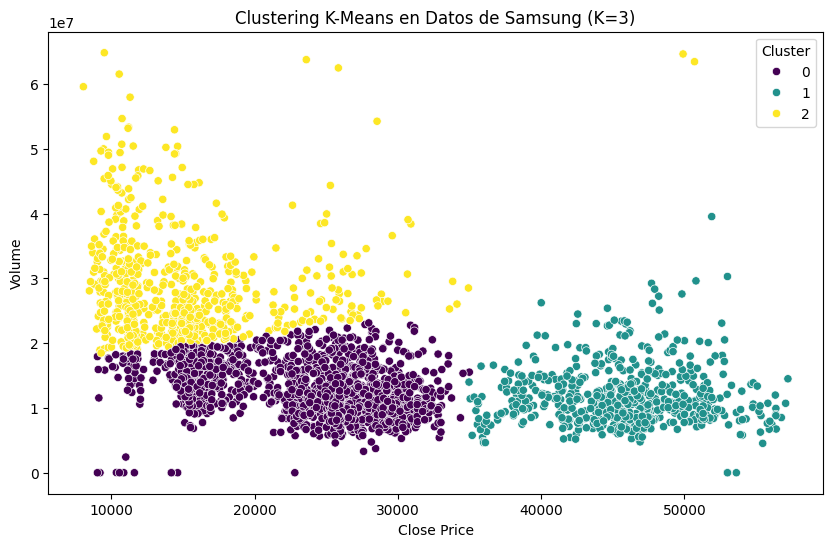

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=datos['Close'], y=datos['Volume'], hue=datos['Cluster'], palette='viridis')
plt.title(f'Clustering K-Means en Datos de Samsung (K={k_optimo})')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.savefig('clusters_samsung.png')
plt.show()